In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
#importing data
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
#rename the column
data.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)
#set ID as index
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


## EDA

In [3]:
#To check any null values in the data
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
#To check duplicated values
data.duplicated().sum()

1

In [7]:
data[data.duplicated]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().any()

False

## Plot the histogram to understand the distribution

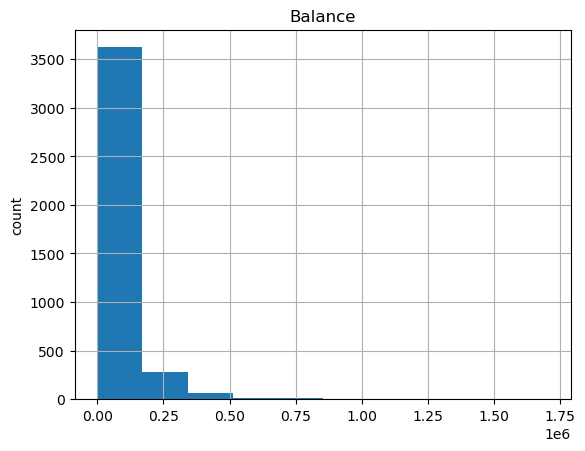

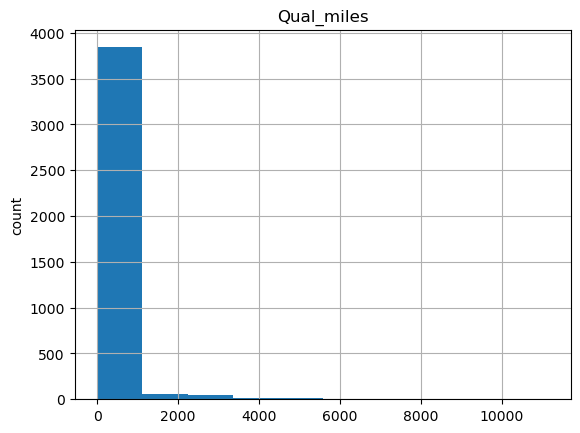

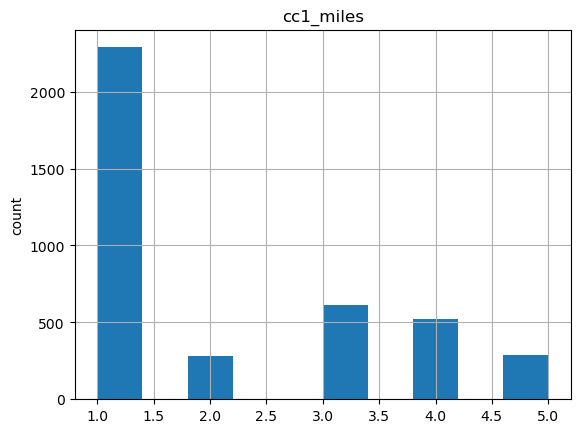

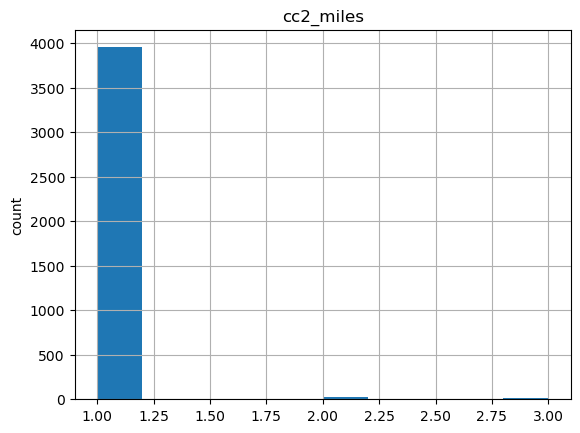

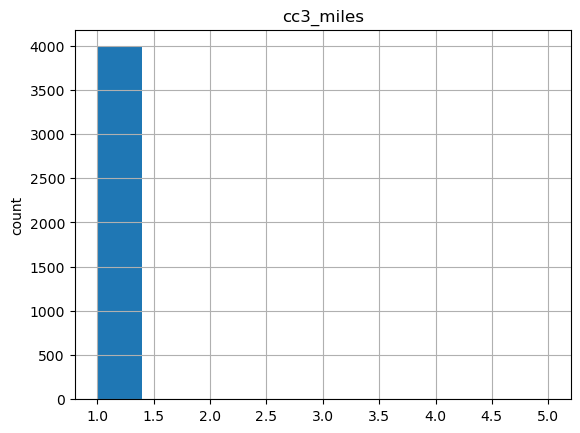

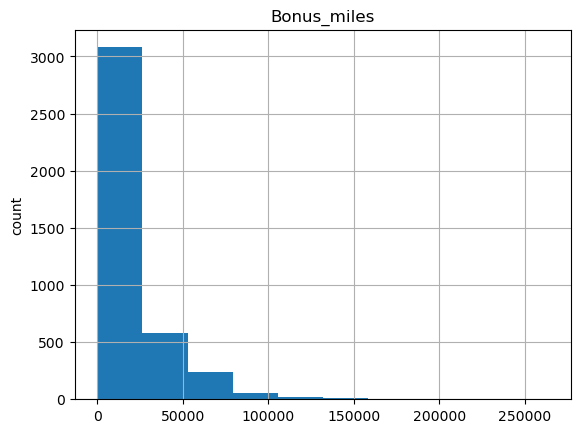

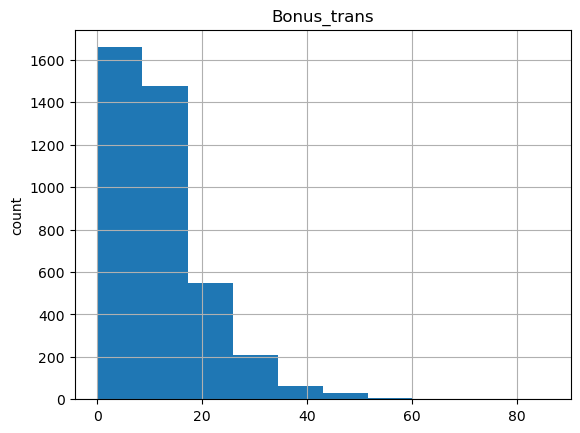

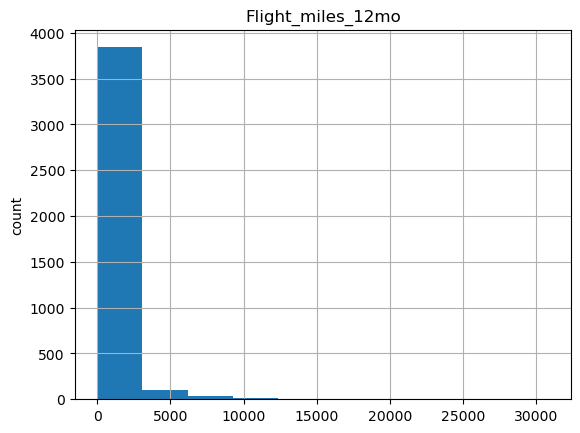

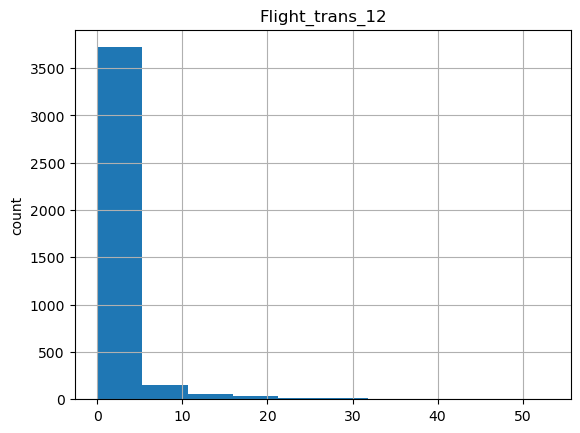

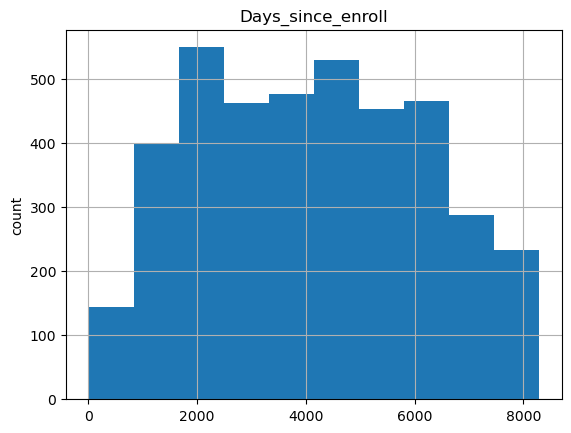

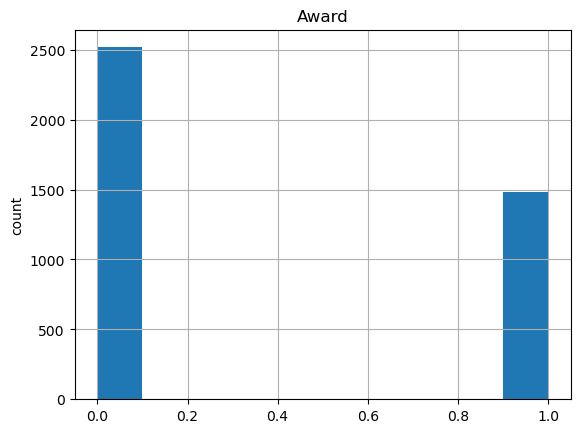

In [10]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=10)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

### Kde-plots

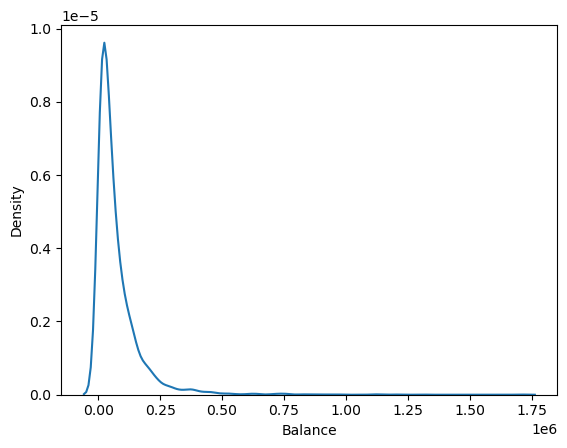

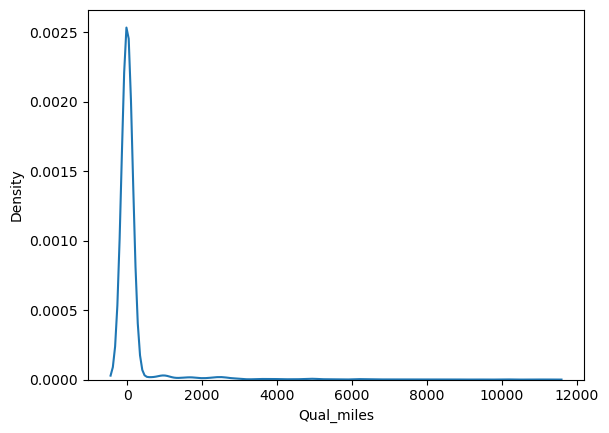

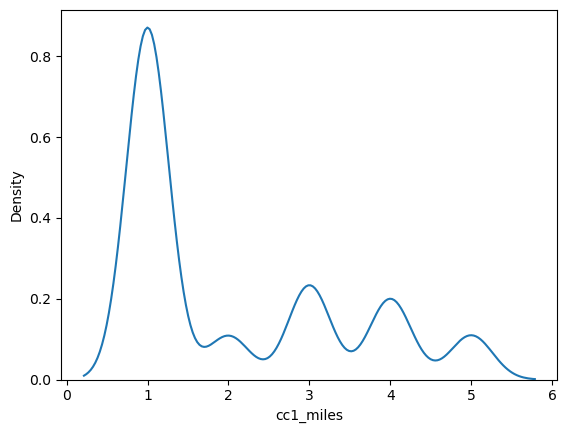

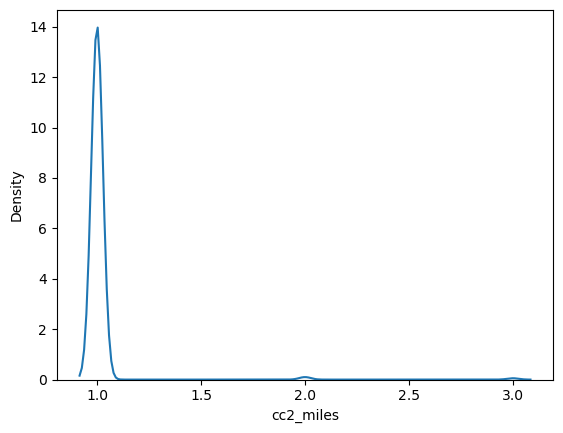

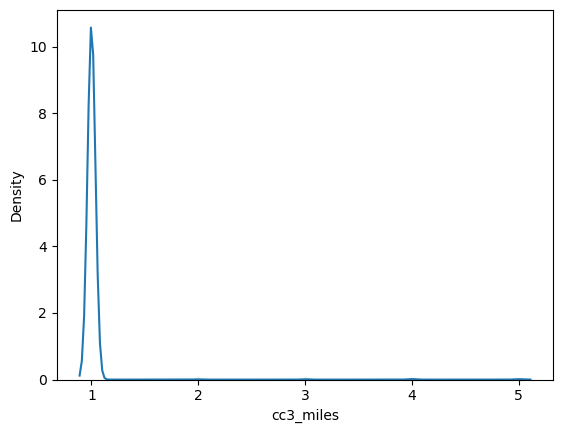

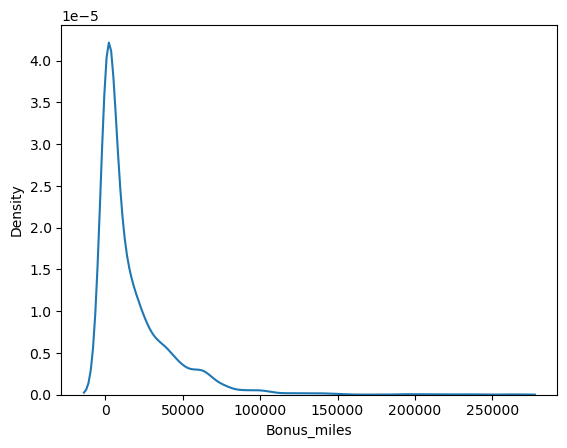

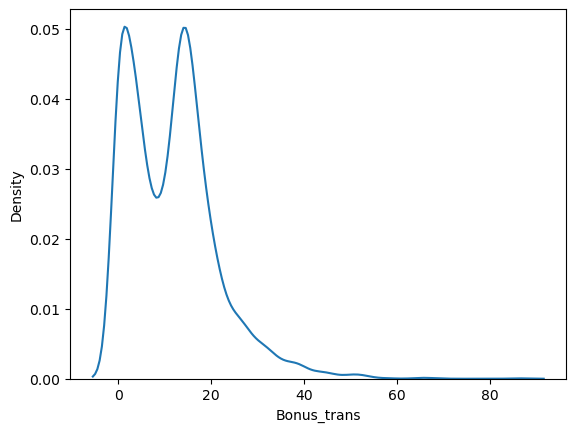

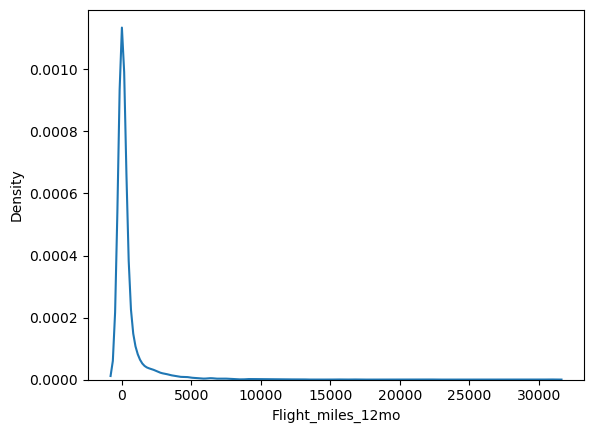

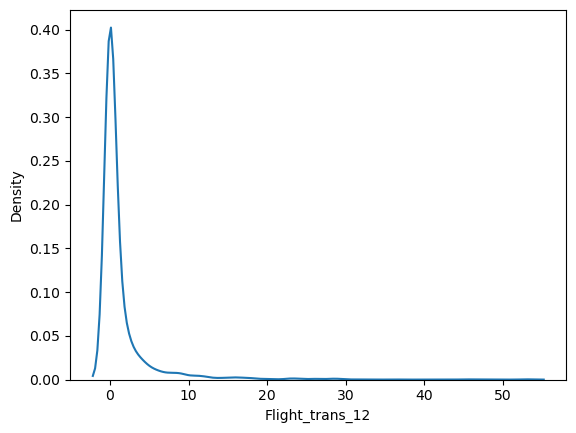

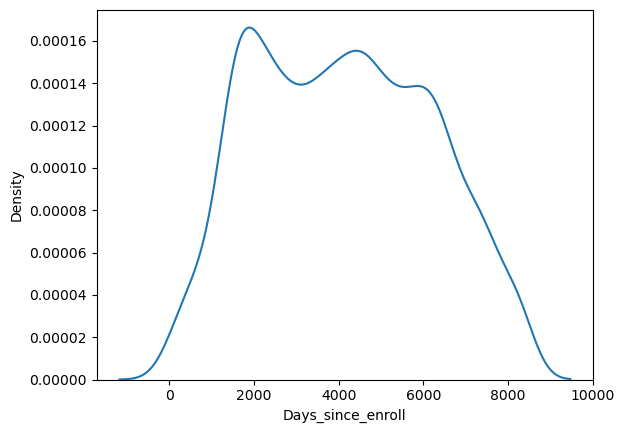

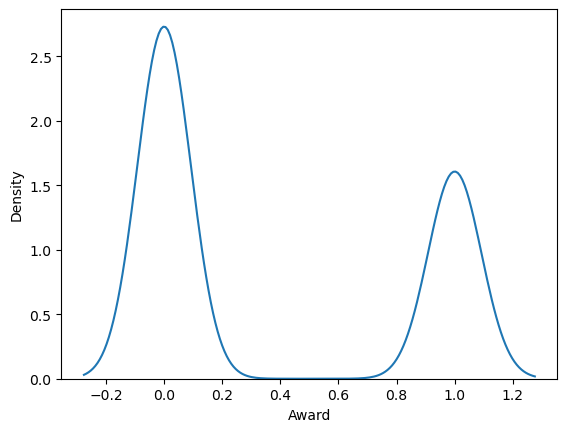

In [11]:
for n in data.columns:
    data=data.copy()
    sns.kdeplot(data[n])
    plt.show()

## Treating outliers

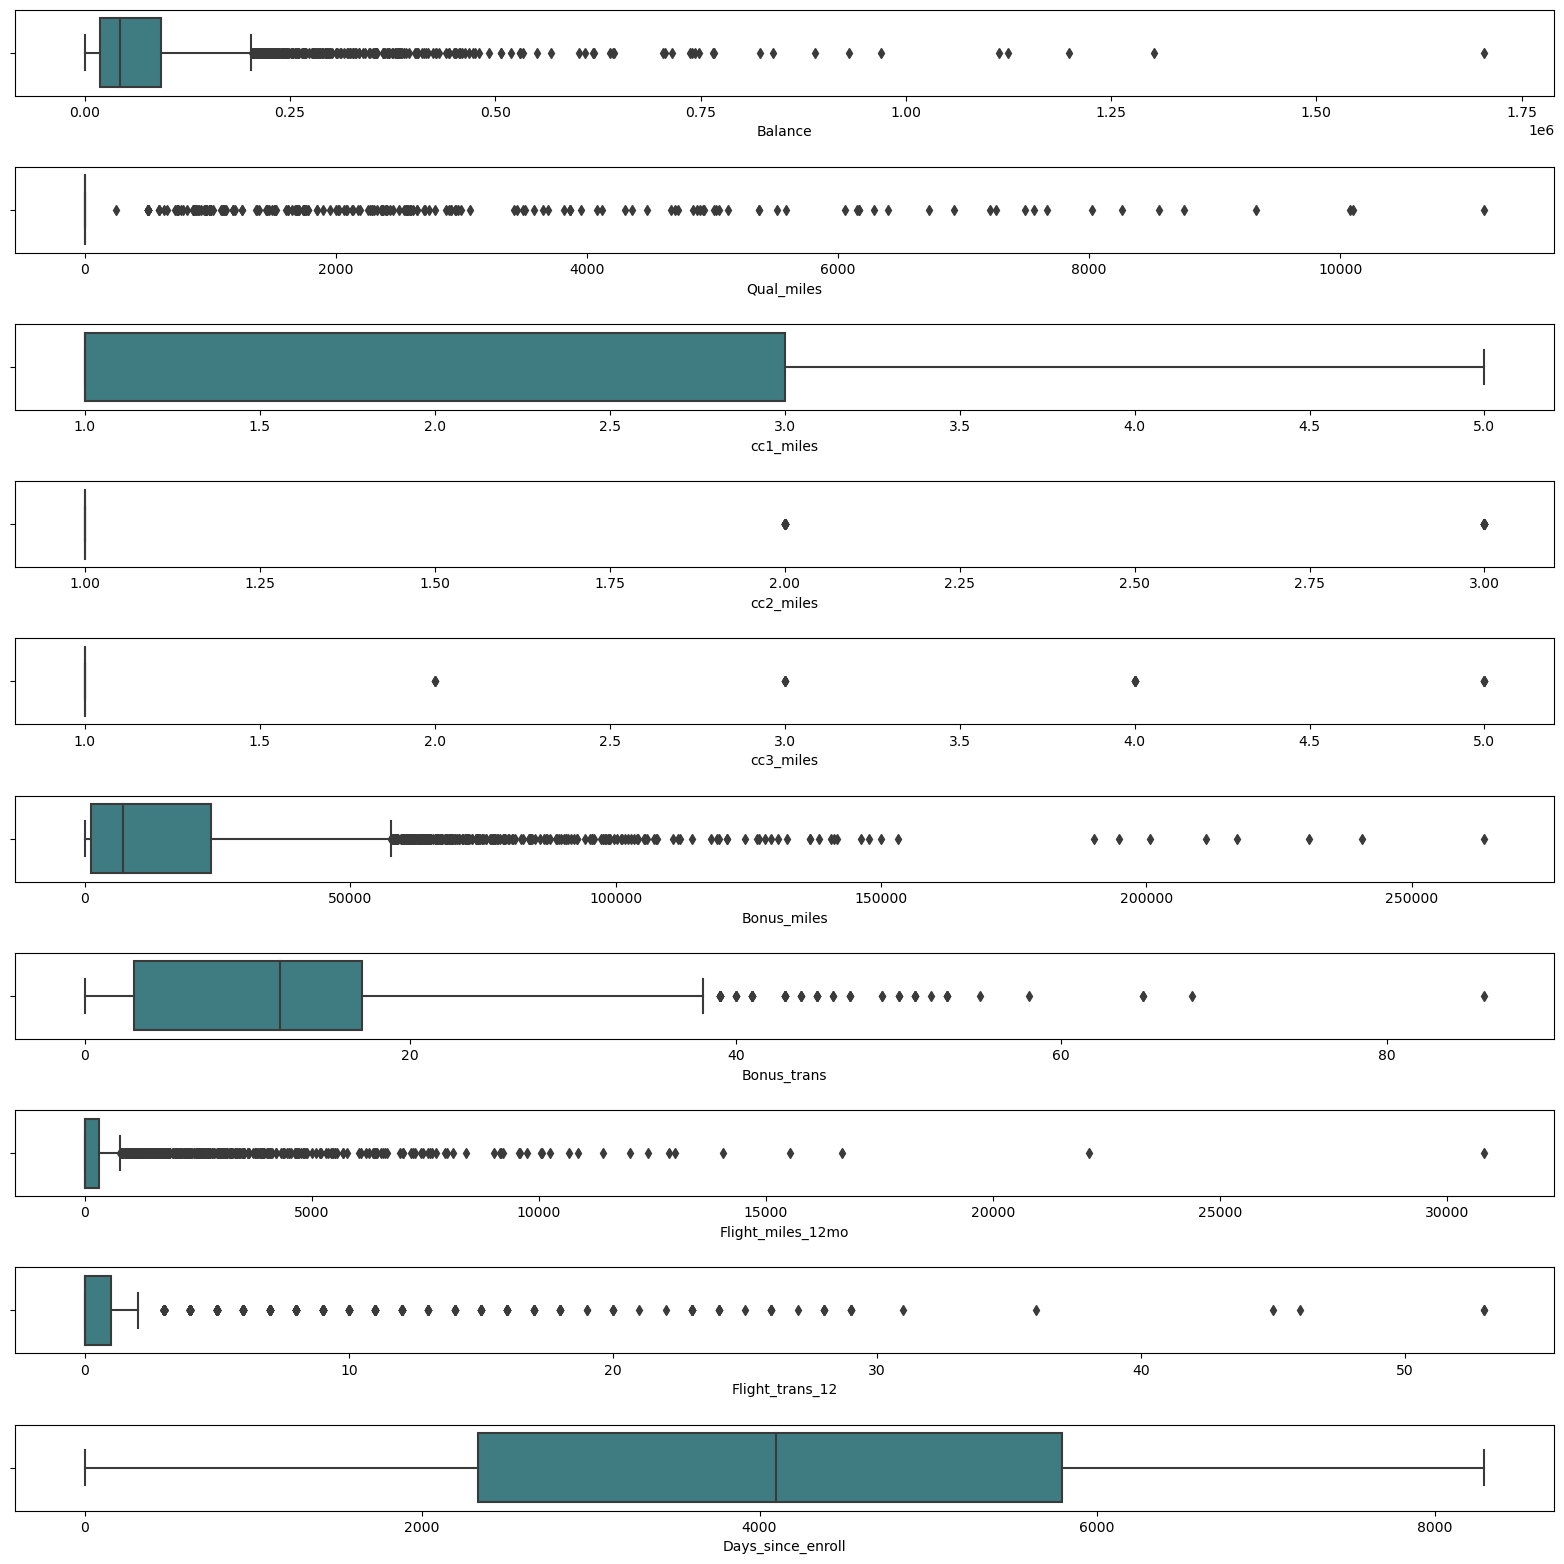

In [12]:
ot=data.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

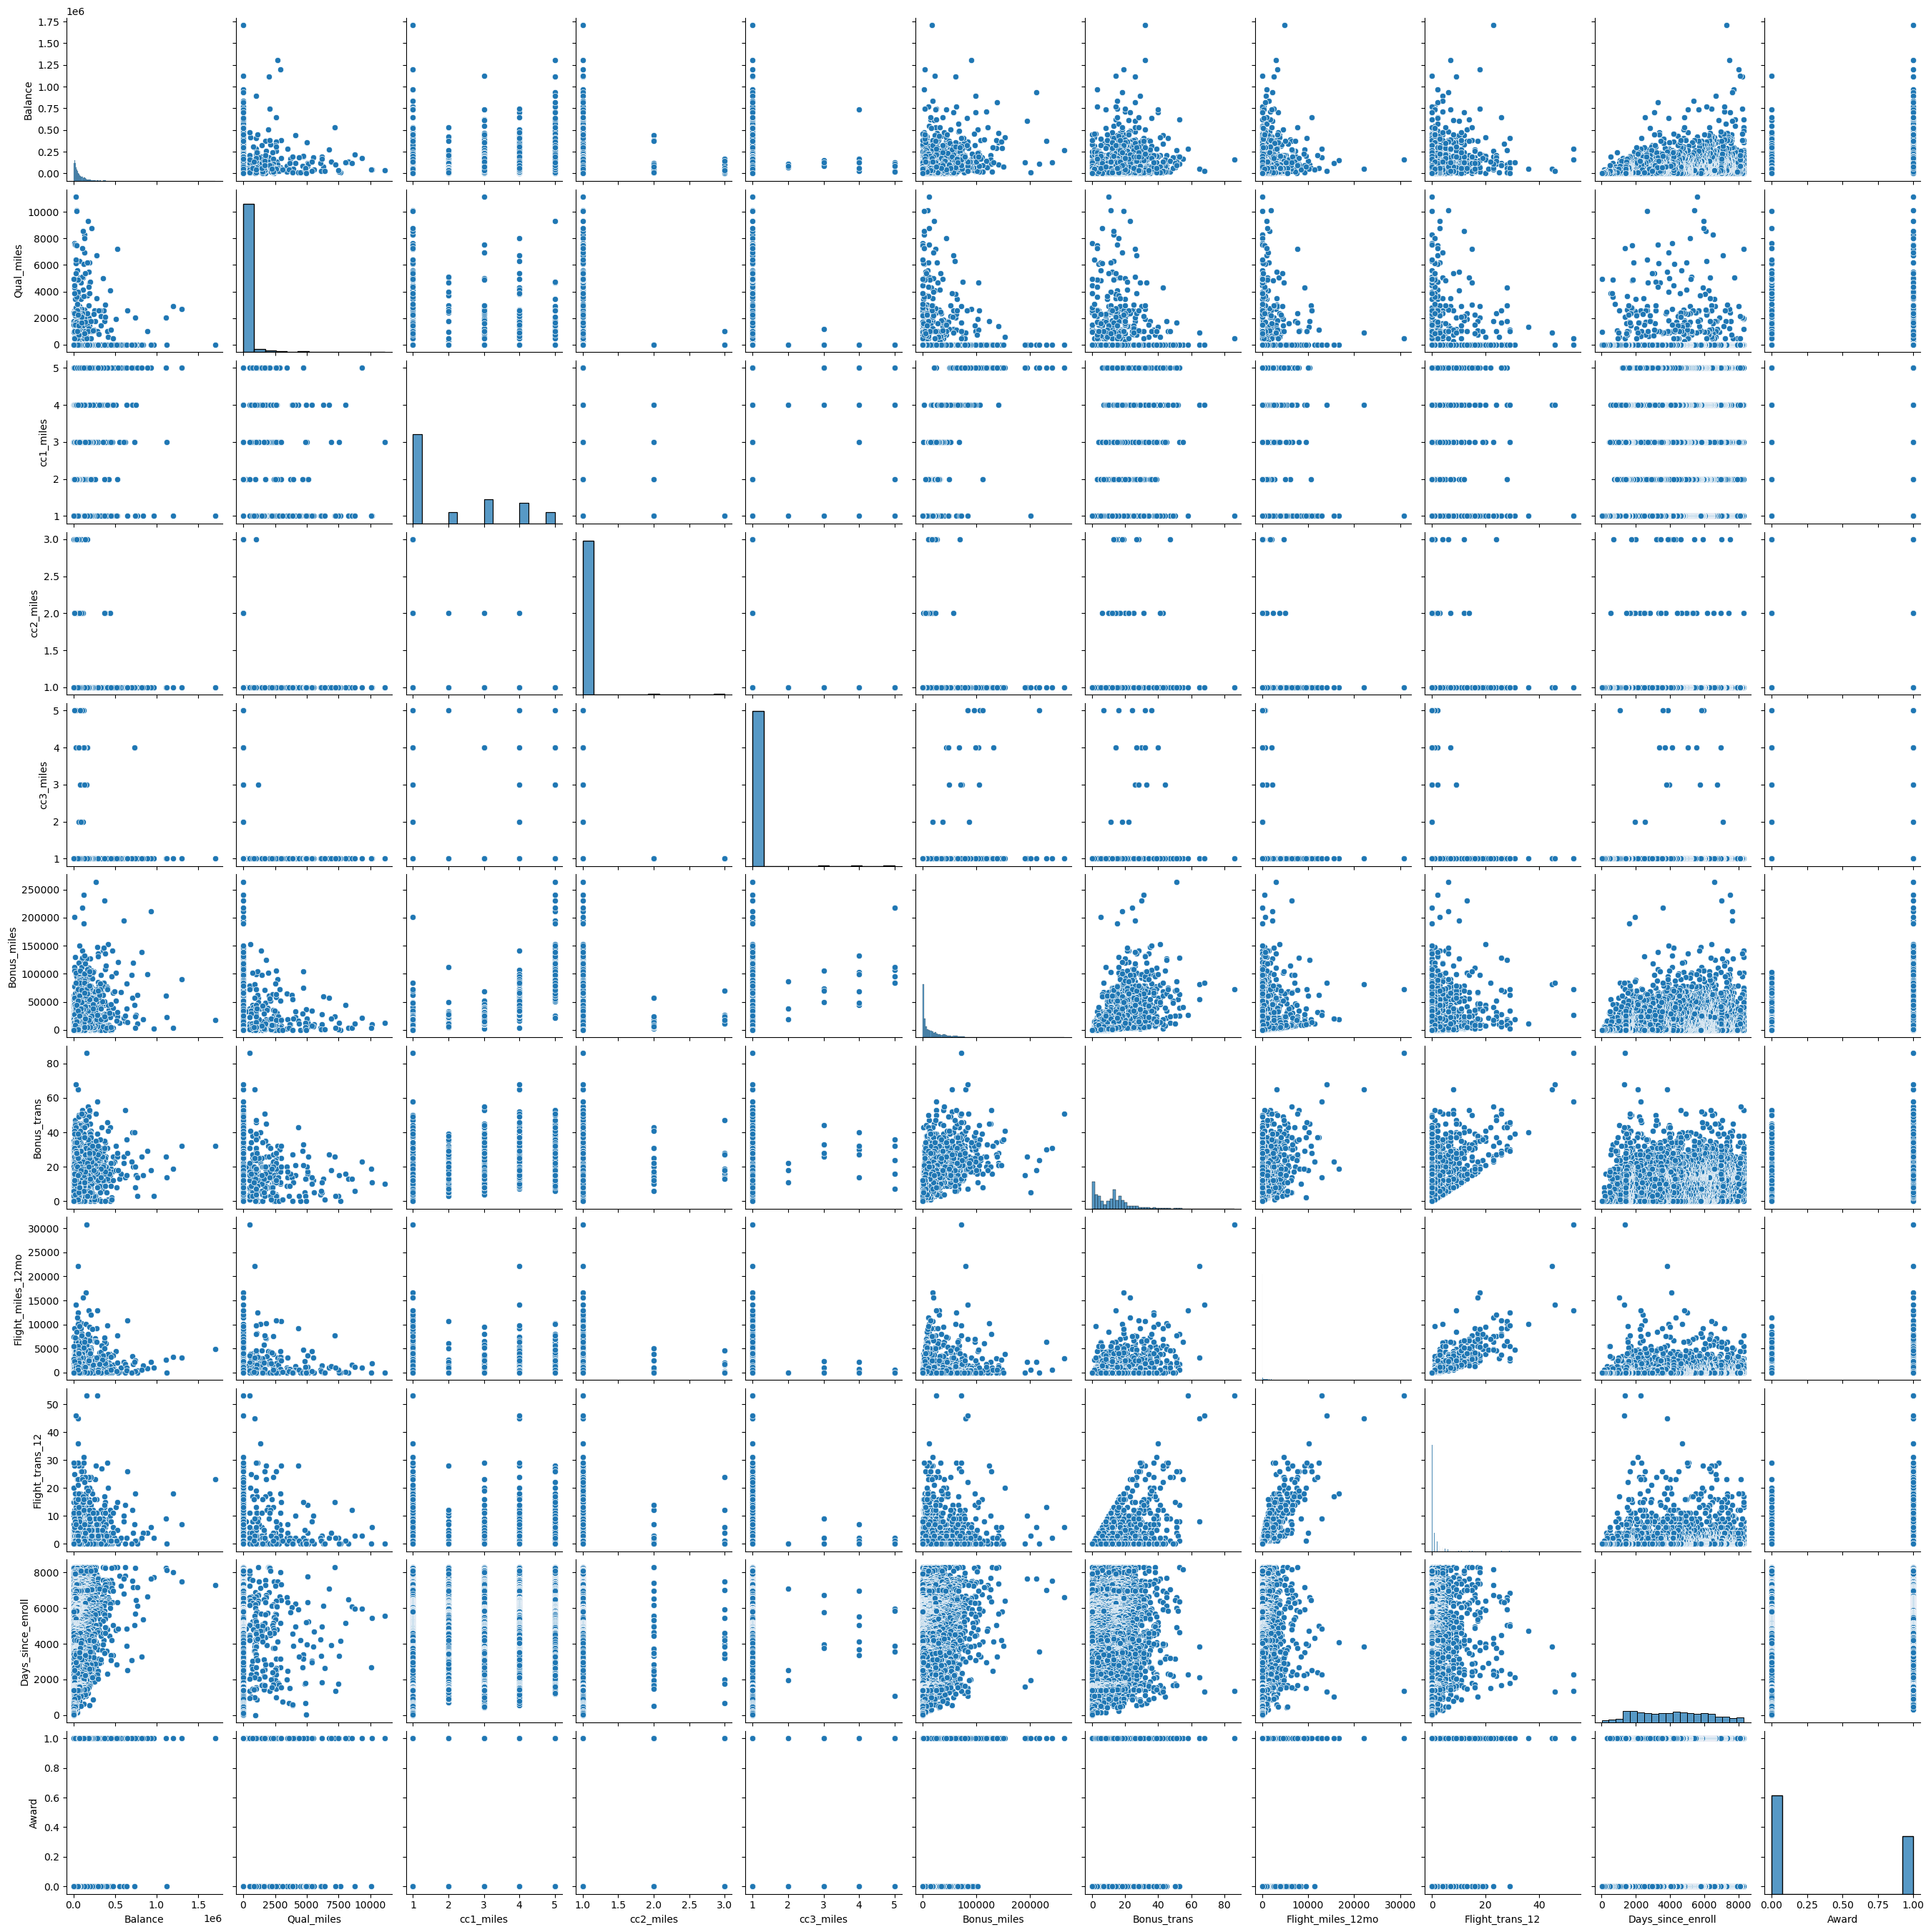

In [13]:
#plot the pairplot to see the relation between features
sns.pairplot(data)

In [14]:
#Correlation check
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


<Axes: >

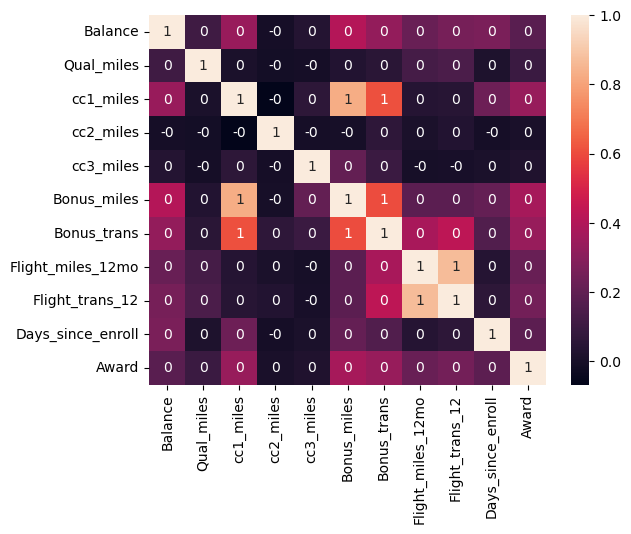

In [15]:
sns.heatmap(data.corr(),annot=True,fmt='0.0f')

## Applying Staandard scaler 

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [17]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [18]:
std_data=std_scale.fit_transform(data)
std_data.shape
std_data

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [19]:
min_max_scale=MinMaxScaler()
min_max_scale

MinMaxScaler()

In [20]:
minmax_data=min_max_scale.fit_transform(data)
minmax_data.shape

(3998, 11)

## Hierarchical clustering for Standard scaled data

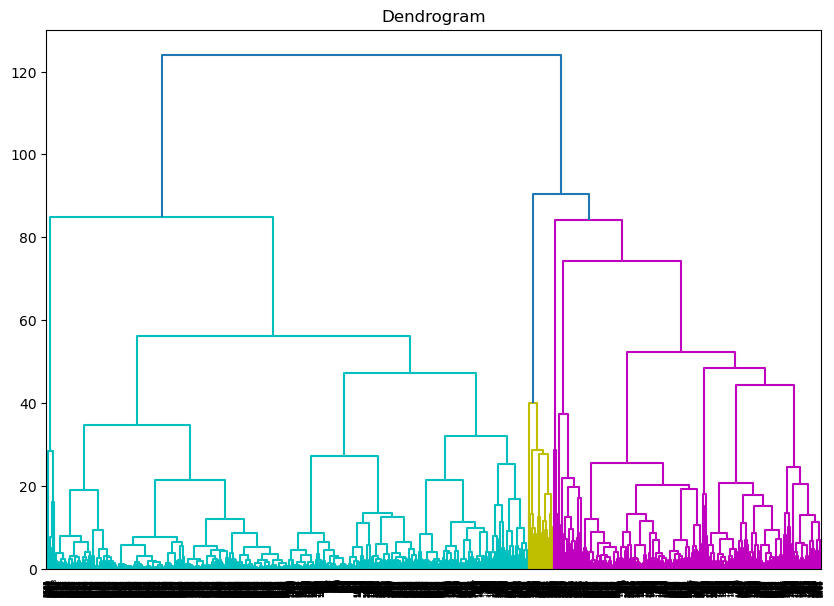

In [21]:
# Determine the optimal number of clusters using the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
sch.set_link_color_palette(['c','y','m'])
dend = sch.dendrogram(sch.linkage(std_data, method='ward'))

In [22]:
# Fit the hierarchical clustering model
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = agg.fit_predict(std_data)
np.unique(y_agg)

array([0, 1, 2, 3], dtype=int64)

## Hierarchical clustering for MinMaxScaled data

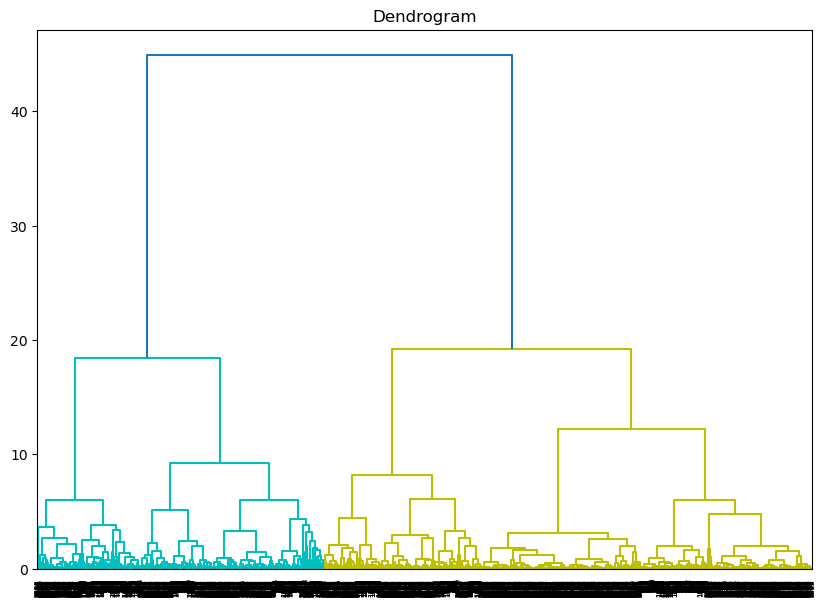

In [23]:
# Determine the optimal number of clusters using the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
sch.set_link_color_palette(['c','y','m'])
dend = sch.dendrogram(sch.linkage(minmax_data, method='ward'))

In [24]:

# Fit the hierarchical clustering model
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg1 = agg.fit_predict(minmax_data)
np.unique(y_agg)

array([0, 1, 2, 3], dtype=int64)

## Hierarchical clustering for Original data

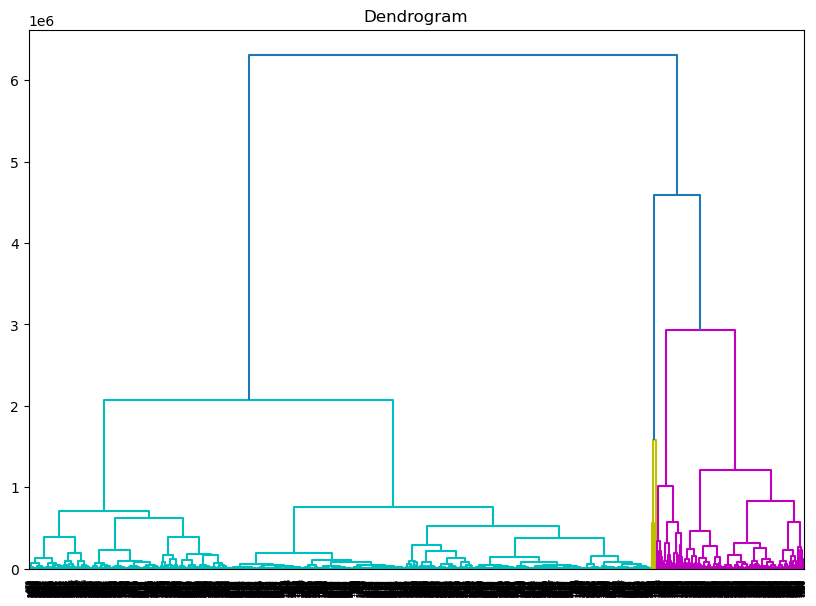

In [25]:
# Determine the optimal number of clusters using the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
sch.set_link_color_palette(['c','y','m'])
dend = sch.dendrogram(sch.linkage(data, method='ward'))

In [26]:
# Fit the hierarchical clustering model
agg= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg2 = agg.fit_predict(data)
cluster=np.unique(y_agg2)
cluster

array([0, 1, 2, 3], dtype=int64)

In [27]:
#Convert the Standard scaled array to  DataFrame
std_data1=pd.DataFrame(std_data,columns=['Balance','Qual_miles','c1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award'])

In [28]:
std_data1

,Balance,Qual_miles,c1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


In [29]:
#Convert the MinMaxScaled array to  DataFrame
minmax_data1=pd.DataFrame(std_data,columns=['Balance','Qual_miles','c1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award'])
minmax_data1

,Balance,Qual_miles,c1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


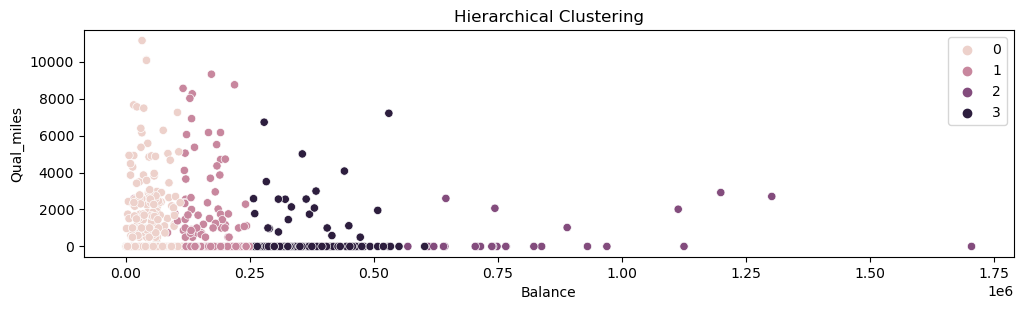

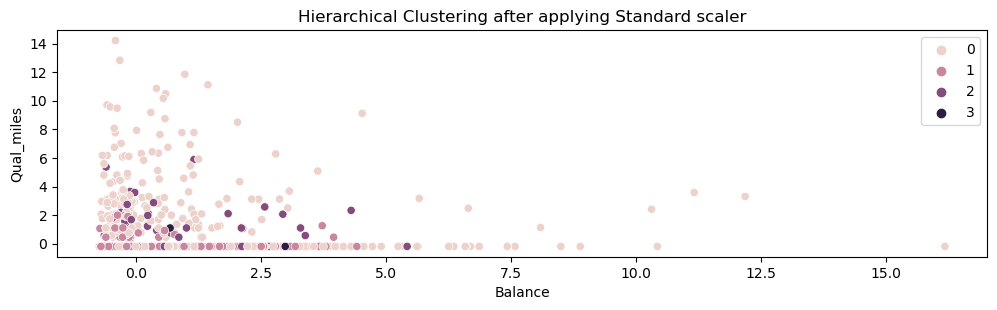

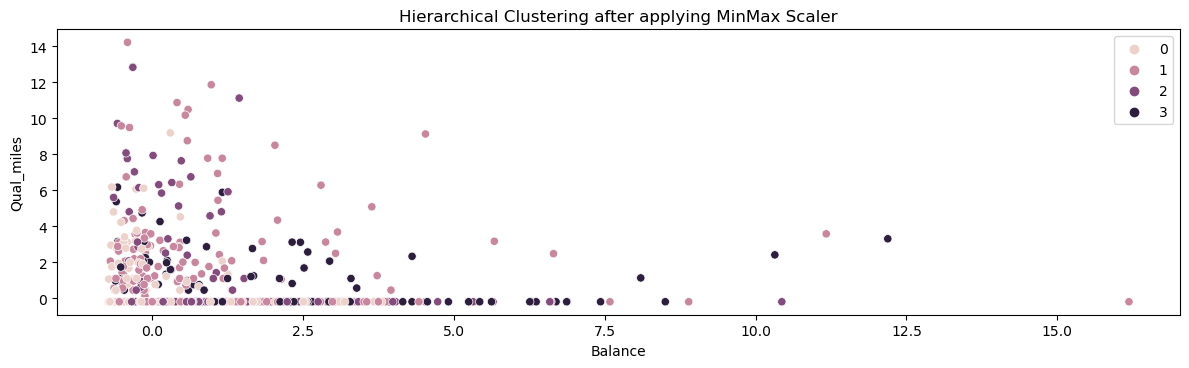

In [30]:
#visualize the hierarchical clusters

#Original data
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.scatterplot(data=data,x=data['Balance'],y=data['Qual_miles'],hue=y_agg2)
plt.title("Hierarchical Clustering")

#Standard scaled data
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
sns.scatterplot(data=std_data1,x=std_data1['Balance'],y=std_data1['Qual_miles'],hue=y_agg)
plt.title("Hierarchical Clustering after applying Standard scaler")

#MinMax sacled data
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)
sns.scatterplot(data=minmax_data1,x=minmax_data1['Balance'],y=minmax_data1['Qual_miles'],hue=y_agg1)
plt.title("Hierarchical Clustering after applying MinMax Scaler")

plt.tight_layout()
plt.show()

## K-Means

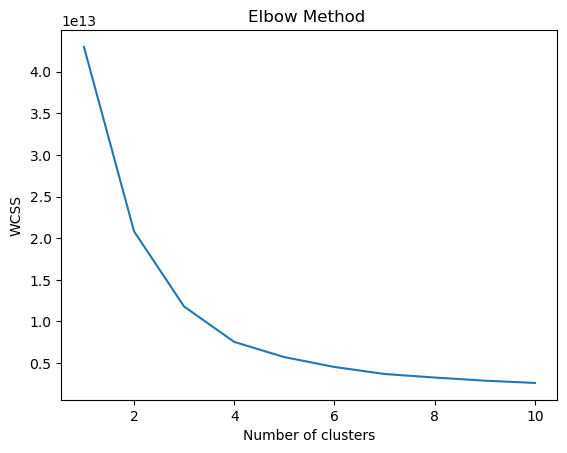

In [31]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method ')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Fit the K-means clustering model
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data)

## K-means cluster for Standard scaled data

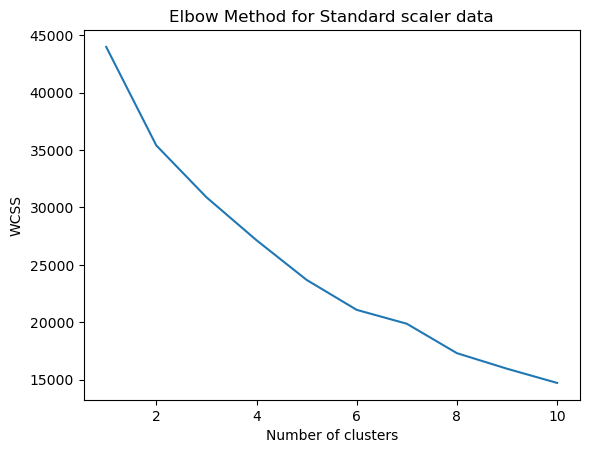

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Standard scaler data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Fit the K-means clustering model
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans1 = kmeans.fit_predict(std_data1)

## K-means cluster for MinMax scaled data

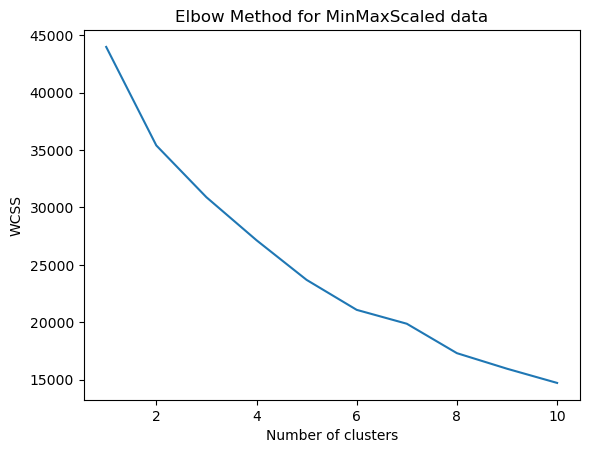

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(minmax_data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for MinMaxScaled data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Fit the K-means clustering model
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans2 = kmeans.fit_predict(minmax_data1)

## DBSCAN

In [34]:
#from sklearn.cluster import DBSCAN
# Fit the DBSCAN clustering model
dbscan = DBSCAN(eps=1000, min_samples=10)
y_dbscan = dbscan.fit_predict(data)
np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [35]:
# for standard scaler
dbscan = DBSCAN(eps=1000, min_samples=10)
y_dbscan1 = dbscan.fit_predict(std_data1)
np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [36]:
# for MinMax scaler
dbscan = DBSCAN(eps=1000, min_samples=10)
y_dbscan2 = dbscan.fit_predict(minmax_data1)
np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

## Visualize the different clusters for Original data

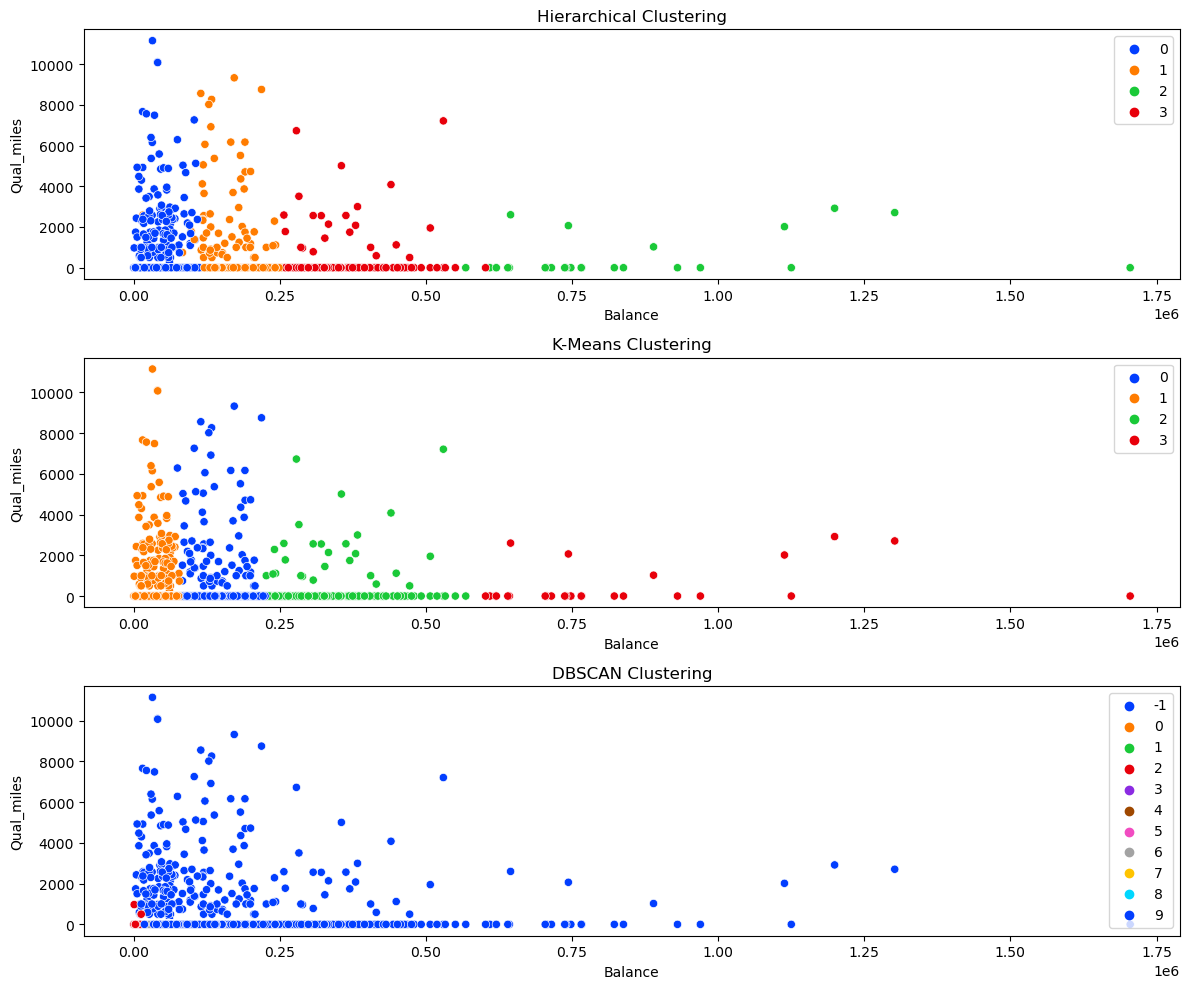

In [38]:
plt.figure(figsize=(12, 10))

#Hierarchical
plt.subplot(3, 1, 1)
sns.scatterplot(data=data, x="Balance", y="Qual_miles", hue=y_agg2, palette='bright')
plt.title("Hierarchical Clustering")

#K-means
plt.subplot(3, 1, 2)
sns.scatterplot(data=data, x="Balance", y="Qual_miles", hue=y_kmeans, palette='bright')
plt.title("K-Means Clustering")

#DBSCAN
plt.subplot(3, 1, 3)
sns.scatterplot(data=data, x="Balance", y="Qual_miles", hue=y_dbscan, palette='bright')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

## Visualize the different clusters for Standard scaler data

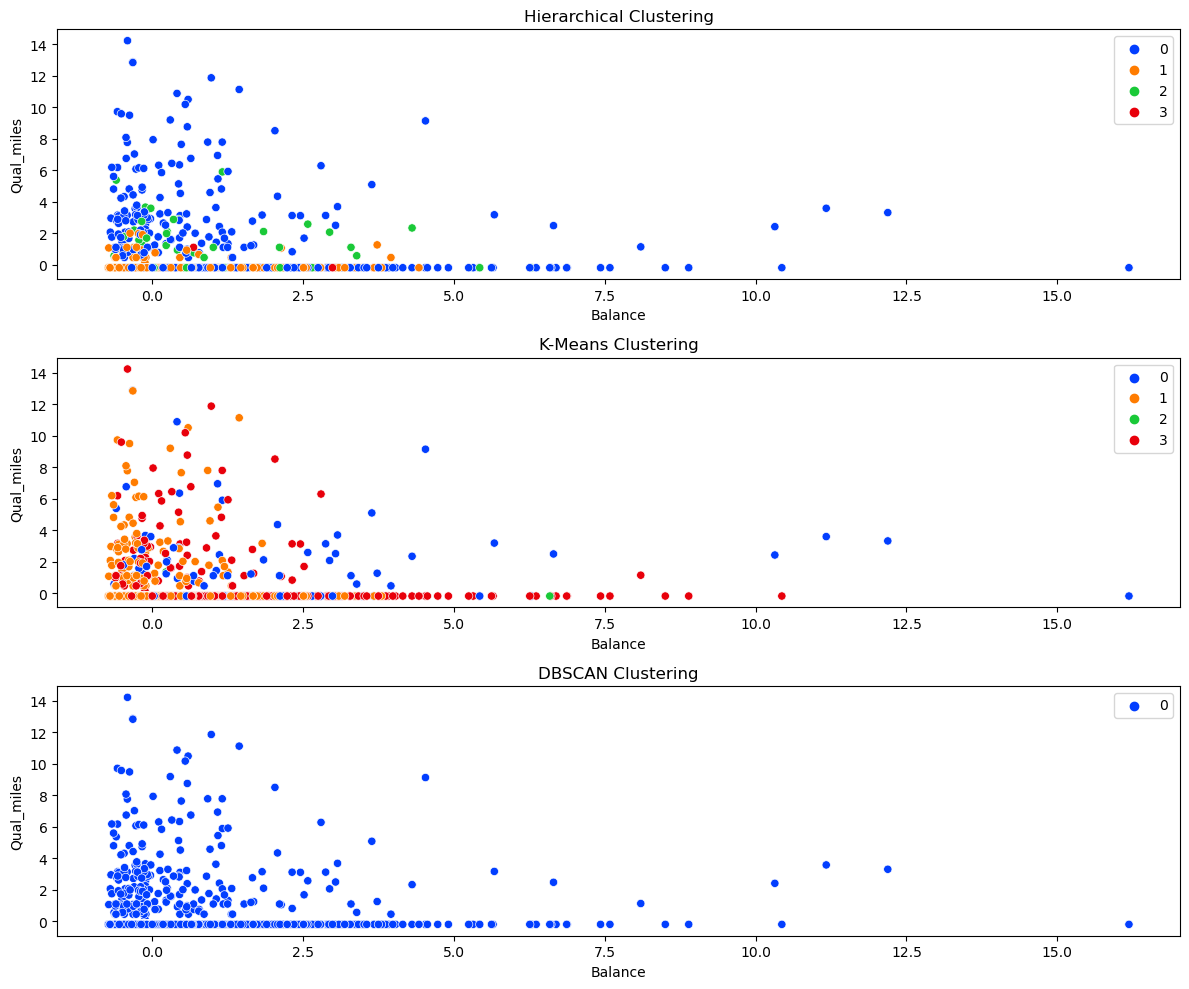

In [39]:
plt.figure(figsize=(12, 10))

#Hierarchical
plt.subplot(3, 1, 1)
sns.scatterplot(data=std_data1, x="Balance", y="Qual_miles", hue=y_agg, palette='bright')
plt.title("Hierarchical Clustering")

#K-means
plt.subplot(3, 1, 2)
sns.scatterplot(data=std_data1, x="Balance", y="Qual_miles", hue=y_kmeans1, palette='bright')
plt.title("K-Means Clustering")

#DBSCAN
plt.subplot(3, 1, 3)
sns.scatterplot(data=std_data1, x="Balance", y="Qual_miles", hue=y_dbscan1, palette='bright')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

## Visualize the different clusters for MinMax scaler data

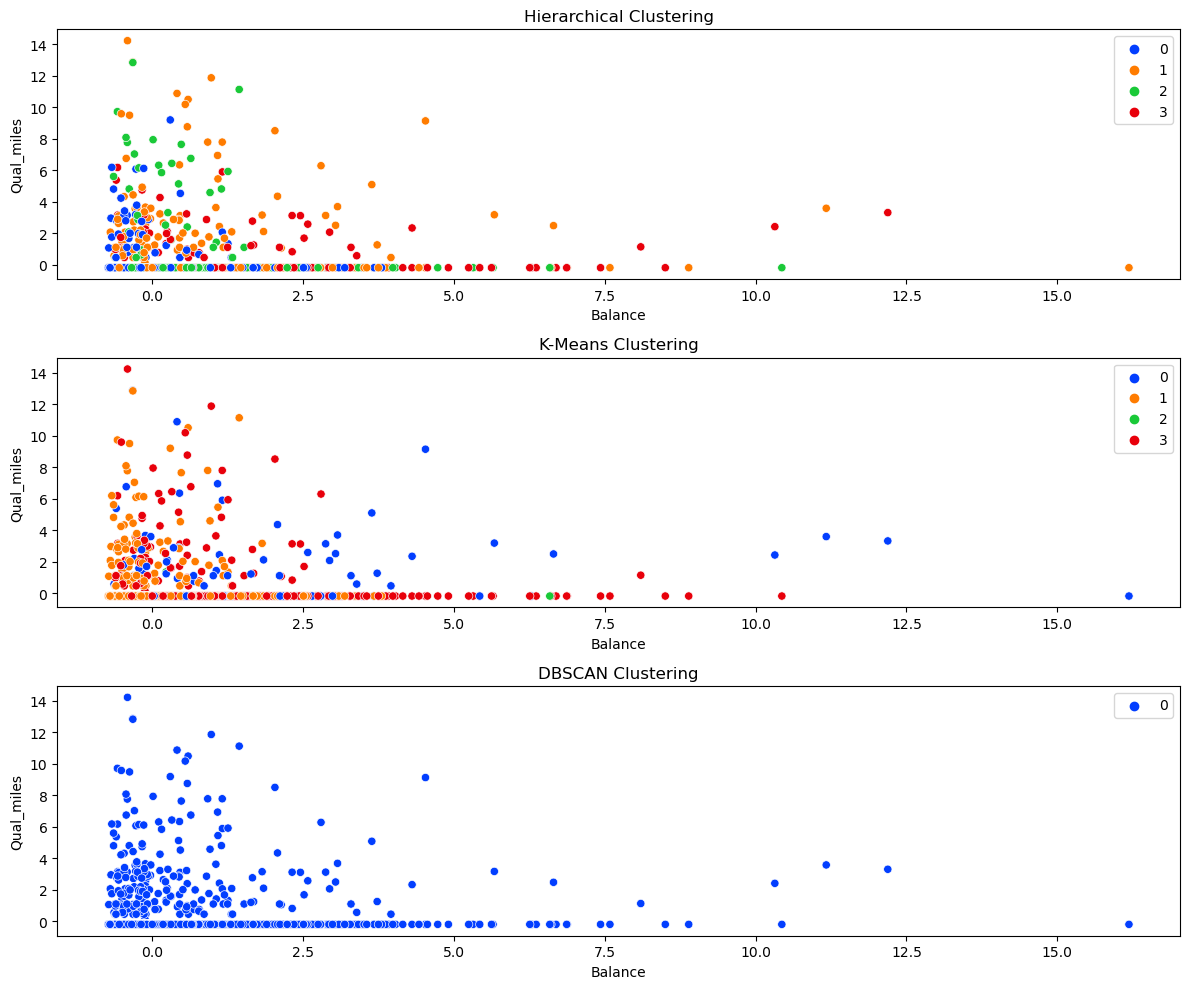

In [40]:
plt.figure(figsize=(12, 10))

#Hierarchical
plt.subplot(3, 1, 1)
sns.scatterplot(data=minmax_data1, x="Balance", y="Qual_miles", hue=y_agg1, palette='bright')
plt.title("Hierarchical Clustering")

#K-means
plt.subplot(3, 1, 2)
sns.scatterplot(data=minmax_data1, x="Balance", y="Qual_miles", hue=y_kmeans2, palette='bright')
plt.title("K-Means Clustering")

#DBSCAN
plt.subplot(3, 1, 3)
sns.scatterplot(data=minmax_data1, x="Balance", y="Qual_miles", hue=y_dbscan2, palette='bright')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

## Minmax scaler data is best to generate the best cluster for this dataset and Hierarchical 
## clustering is best compare to KMeans and DBSCAN